Data madness setup

In [159]:
#Imports
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [160]:
# Load 
complete_data = pd.read_csv("athlete_events.csv")

print(complete_data.columns.values)
#1. ID - Row numbers
#2. Name - Athlete's name
#3. Sex - M or F
#4. Age - Integer
#5. Height - In centimeters
#6. Weight - In kilograms
#7. Team - Team name
#8. NOC - National Olympic Committee 3-letter code
#9. Games - Year and season
#10. Year - Integer
#11. Season - Summer or Winter
#12. City - Host city
#13. Sport - Sport
#14. Event - Event
#15. Medal - Gold, Silver, Bronze, or NA
complete_data.head(3)

['ID' 'Name' 'Sex' 'Age' 'Height' 'Weight' 'Team' 'NOC' 'Games' 'Year'
 'Season' 'City' 'Sport' 'Event' 'Medal']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [161]:
# Functions

# Medal convertion to numeric columns
def convert_medals(data):
    types = ['', 'Gold', 'Silver', 'Bronze']
    
    cat_type = CategoricalDtype(categories=types)
    
    data['Medal'] = data['Medal'].astype(cat_type)
    data = pd.get_dummies(data,
                          prefix='mdl',
                          columns=['Medal'], 
                          drop_first=True)
    
    return data

In [162]:
# Clean data

# Sort by olympic event (years) to make it easier to interpret
complete_data = complete_data.sort_values('Games')

# Replacing all NaN values with 0
complete_data = complete_data.fillna(0)

# Convert medals to numerical values
complete_data = convert_medals(complete_data)

# Ideas:
# Ethics -> Electronic clocks only started since 1936 (we could do something with that)

complete_data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,mdl_Gold,mdl_Silver,mdl_Bronze
132219,66542,Leonidas Lanngakis,M,0.0,0.0,0.0,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",0,0,0
214353,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rings,0,0,0
214352,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",1,0,0
24682,12929,John Mary Pius Boland,M,25.0,0.0,0.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,1,0,0
214351,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",1,0,0


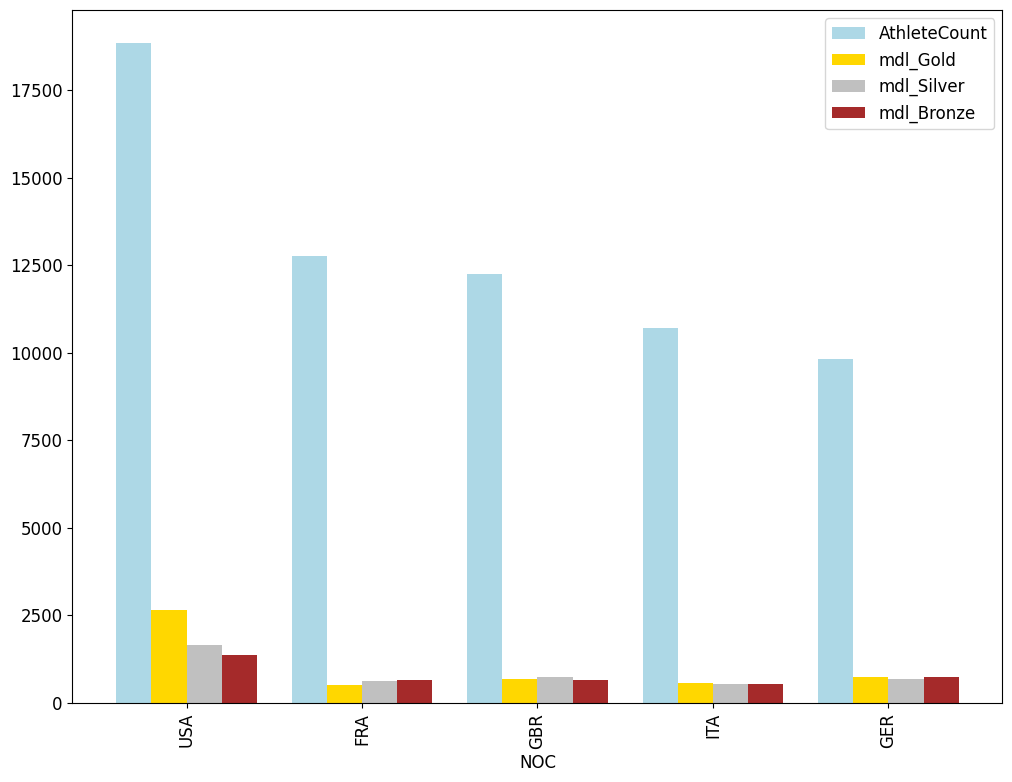

In [305]:
# Medals per country Vs Competing athletes per country
Medals = complete_data[['NOC', 'mdl_Gold', 'mdl_Silver', 'mdl_Bronze']].groupby(['NOC'], as_index=False).sum()

AthleteCount = complete_data['NOC'].value_counts()
AthleteCount = AthleteCount.sort_index()

Medals.insert(1, column='AthleteCount', value=AthleteCount.values)

# Get top 5 in Athlete count and top 5 in Medals
TopAc = Medals.sort_values('AthleteCount', ascending=False).head(5)
TopGold = Medals.sort_values('mdl_Gold', ascending=False).head(5)
TopSilver = Medals.sort_values('mdl_Silver', ascending=False).head(5)
TopBronze = Medals.sort_values('mdl_Bronze', ascending=False).head(5)


fig, ax = plt.subplots()
TopAc.set_index('NOC').plot(kind='bar', ax=ax, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
#TopGold.set_index('NOC').plot(kind='bar', ax=ax2, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
#TopSilver.set_index('NOC').plot(kind='bar', ax=ax3, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
#TopBronze.set_index('NOC').plot(kind='bar', ax=ax4, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
plt.show()



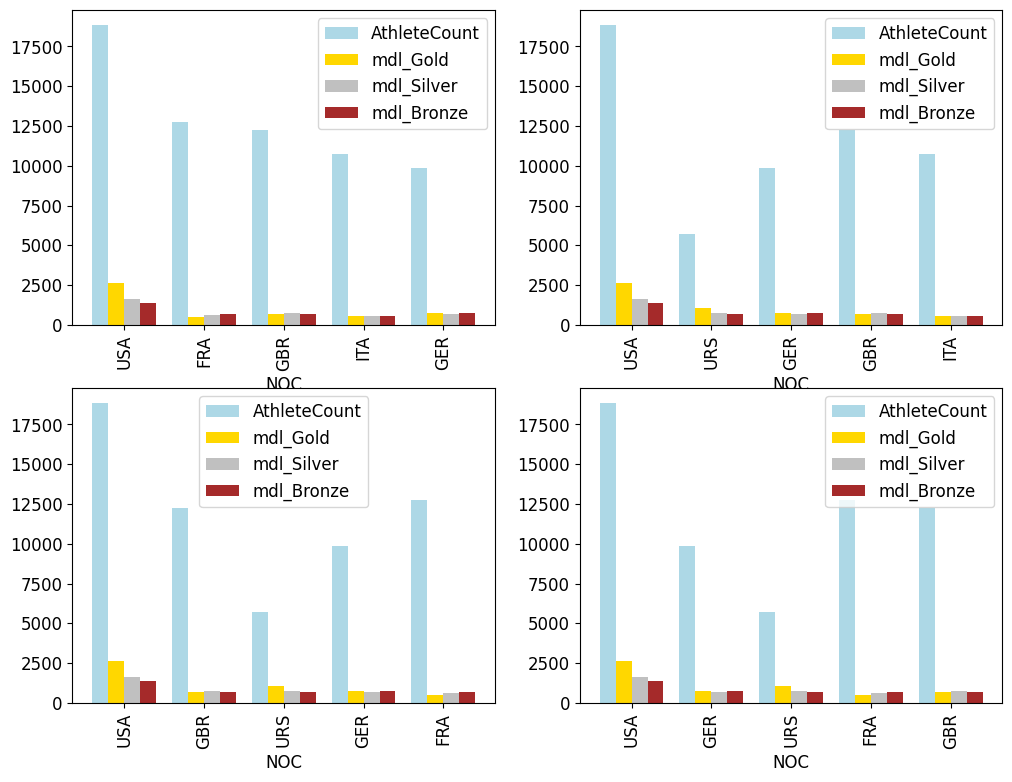

In [304]:
# Testing some shit with multiplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1 = TopAc.set_index('NOC').plot(kind='bar', ax=ax1, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
ax2 = TopGold.set_index('NOC').plot(kind='bar', ax=ax2, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
ax3 = TopSilver.set_index('NOC').plot(kind='bar', ax=ax3, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])
ax4 = TopBronze.set_index('NOC').plot(kind='bar', ax=ax4, width=0.8, color=['lightblue', 'gold', 'silver', 'brown'])

for ax in fig.get_axes():
    ax.label_outer()